# Airbnb - Sentiment Analysis 

### Importing the Libraries 

In [45]:
import pandas as pd
import numpy as np
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem.porter import *
import matplotlib.pyplot as plt

### Data Understanding 

In [26]:
review=pd.read_csv(r"C:\Users\Nikhi\OneDrive - purdue.edu\Mod 1\IT Project Managament\Group Project\reviews.csv",parse_dates=["date"])
print(review.shape)
print(review.columns)
review=review.head(20000)
review.head(5)

(400336, 6)
Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


### Importing list of positive words and negative words

In [27]:
#Importing positive words and negative words
positive=pd.read_csv(r"C:\Users\Nikhi\OneDrive - purdue.edu\Mod 1\IT Project Managament\Group Project\positive-words.txt",header=None)
negative=pd.read_csv(r"C:\Users\Nikhi\OneDrive - purdue.edu\Mod 1\IT Project Managament\Group Project\negative-words.txt",header=None)

In [28]:
#naming the column 
positive.columns=['words']
print(positive.head())
#Naming the column
negative.columns=['words']
negative.head()

        words
0      abound
1     abounds
2   abundance
3    abundant
4  accessable


,words
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


### Data Pre-processing

In [29]:
#saving the stop words list 
stop_words=stopwords.words('english')
#Importing the stemmer 
stemmer=PorterStemmer()
#Functions to do the preprocessing 
stem_words=lambda x: stemmer.stem(x)
#Breaking into words - Tokenization 
break_into_words = lambda x : re.findall("[a-zA-Z0-9]+", x)
#Skipping stop words
skip_stop_words = lambda x: [w for w in x if w not in list(stop_words)]
#Excluding numeric data types
skip_numeric = lambda x : [w for w in x if not w.isnumeric()]

In [30]:
#Converting into lower case 
review['review']=review['comments'].astype(str)
review['review']=review['review'].str.lower()

In [31]:
#Applying the above functions
review['review2']=review['review'].apply(stem_words)
review['review2']=review['review2'].apply(break_into_words)
review['review2']=review['review2'].apply(skip_stop_words)
review['review2']=review['review2'].apply(skip_numeric)

### Feature Engineering

In [32]:
#count number of positive words
positive_words_count=review['review2'].map(lambda x: len([w for w in x if w in list(positive['words'])]))
#count number of negative words
negative_words_count=review['review2'].map(lambda x: len([w for w in x if w in list(negative['words'])]))
#Adding them back to the dataframe
review['positive']=positive_words_count
review['negative']=negative_words_count

### Sentiment Score

In [33]:
def sentiment_score(x):
    if (x['positive']==0) and (x['negative']==0):
        return None 
    if x['positive']>x['negative']:
        return (x['positive']/(x['positive']+x['negative']))
    else:
        return -1*(x['negative']/(x['positive']+x['negative']))

In [34]:
review['score']=review.apply(sentiment_score,axis=1)

In [35]:
review['score'].describe()

count    18024.000000
mean         0.835987
std          0.456521
min         -1.000000
25%          0.900000
50%          1.000000
75%          1.000000
max          1.000000
Name: score, dtype: float64

### Counting the number of positive words

In [36]:
dict_positive={}
for i in review['review2']:
    for j in i:
        if j in list(positive['words']):
            if j in dict_positive.keys():
                dict_positive[j]=dict_positive[j]+1
            else:
                dict_positive[j]=1
positive_df=pd.DataFrame(dict_positive,index=['Words','Count'])
positive_df1=positive_df.T
positive_df1['Words']=positive_df1.index
positive_df1.reset_index()
positive_df1.head()
positive_df1.shape

(852, 2)

### Counting the number of negative words

In [37]:
#Negative words
dict_negative={}
for i in review['review2']:
    for j in i:
        if j in list(negative['words']):
            if j in dict_negative.keys():
                dict_negative[j]=dict_negative[j]+1
            else:
                dict_negative[j]=1
negative_df=pd.DataFrame(dict_negative,index=['Words','Count'])
negative_df1=negative_df.T
negative_df1['Words']=negative_df1.index
negative_df1.head()
negative_df1.shape

(800, 2)

# Analysis

In [38]:
positive_df1.sort_values("Count",ascending=False).head(20)

,Words,Count
great,great,10147
nice,nice,5384
clean,clean,4306
recommend,recommend,4022
perfect,perfect,3829
comfortable,comfortable,3164
good,good,3133
well,well,2964
lovely,lovely,2652
helpful,helpful,2642


In [39]:
negative_df1.sort_values("Count",ascending=False).head(20)

,Words,Count
die,die,1197
steep,steep,462
tout,tout,426
problem,problem,403
noise,noise,277
cold,cold,262
noisy,noisy,172
bad,bad,167
issue,issue,163
problems,problems,158


In [47]:
review['Date_Year']=pd.DatetimeIndex(review['date']).year
review['Date_Month']=pd.DatetimeIndex(review['date']).month


In [48]:
review.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'review', 'review2', 'positive', 'negative', 'score', 'Date_Year',
       'Date_Month'],
      dtype='object')

In [42]:
Score_yoy=review.groupby(['Date_Year'])['score'].mean()

Text(0, 0.5, 'Sentiment Score')

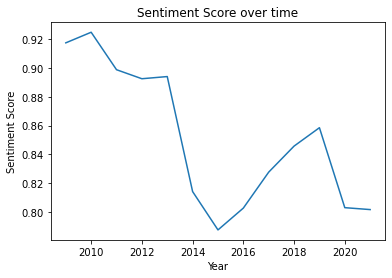

In [69]:
plt.plot(Score_yoy)
plt.title("Sentiment Score over time")
plt.xlabel("Year")
plt.ylabel("Sentiment Score")

In [75]:
Score_mom=review[review['Date_Year']>=2020].groupby(['Date_Year','Date_Month'])['score'].mean()

In [77]:
Score_mom_df=pd.DataFrame(Score_mom)
Score_mom_df.reset_index(inplace=True)

In [84]:
Score_mom_df.head()

,Date_Year,Date_Month,score
0,2020,1,0.904164
1,2020,2,0.872668
2,2020,3,0.821495
3,2020,4,0.866667
4,2020,5,0.777778


In [90]:
#Score_mom['Key']=Score_mom.apply(lambda x: str(x['Date_Year']).join(str(x['Date_Month'])))
Score_mom_df['Key']=Score_mom_df['Date_Year'].astype(str)+Score_mom_df['Date_Month'].astype(str)

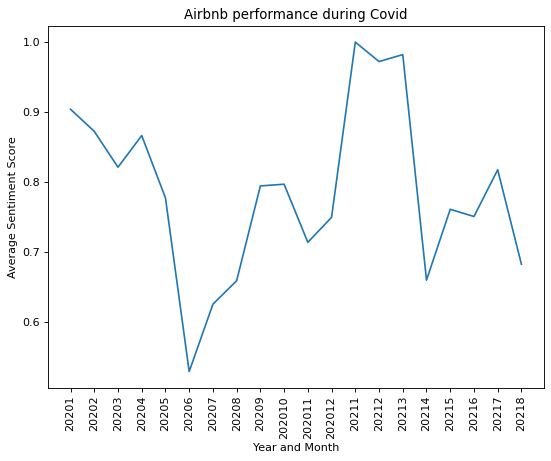

In [99]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.title("Airbnb performance during Covid")
plt.xlabel("Year and Month")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=90)
plt.plot(Score_mom_df['Key'],Score_mom_df['score'])

# Results 

1.Sentiment dropped after March 2020, but as the company takes remedial steps, sentiment increased over time <br>
2.From March to June, there are more cancellations than the bookings <br>
2.Top positive and negative comments did not change much in pre and post Covid <br>
3.Dirty and Crowded are highlighted negative comments post-Covid which can be suggestion to Airbnb hotels which are having low sentiment scores

# Thank you!